## Acquiring Data

In [ ]:
!pip install kaggle

!mkdir .kaggle

import json
token = {"username":"aryagijare","key":"22803b7f532ecb6c6e9a180c69b87e75"} # replace with your kaggle username and generated API Key
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

# Kaggle API for dataset
!kaggle datasets download -d weapons-images

# unzip dataset after downloading
!unzip \*.zip


Streaming output truncated to the last 5000 lines.
  inflating: Weapons/train/Grenade/865.jpg  
  inflating: Weapons/train/Grenade/866.jpg  
  inflating: Weapons/train/Grenade/867.jpg  
  inflating: Weapons/train/Grenade/868.jpg  
  inflating: Weapons/train/Grenade/869.jpg  
  inflating: Weapons/train/Grenade/870.jpg  
  inflating: Weapons/train/Grenade/871.jpg  
  inflating: Weapons/train/Grenade/872.jpg  
  inflating: Weapons/train/Grenade/873.jpg  
  inflating: Weapons/train/Grenade/874.jpg  
  inflating: Weapons/train/Grenade/875.jpg  
  inflating: Weapons/train/Grenade/876.jpg  
  inflating: Weapons/train/Grenade/877.jpg  
  inflating: Weapons/train/Grenade/878.jpg  
  inflating: Weapons/train/Grenade/879.jpg  
  inflating: Weapons/train/Grenade/880.jpg  
  inflating: Weapons/train/Grenade/881.jpg  
  inflating: Weapons/train/Grenade/882.jpg  
  inflating: Weapons/train/Grenade/883.jpg  
  inflating: Weapons/train/Grenade/884.jpg  
  inflating: Weapons/train/Grenade/885.jpg  
  in

## Importing Libraries

In [ ]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dropout, Activation, Flatten, Dense
from keras import backend as k
import tensorflow as tf
import os

In [ ]:
# to hide the deprecation warnings (doesn't do much good though, we get a lot of warnings anyway - ignore them for now.
import warnings
warnings.filterwarnings('ignore', category= DeprecationWarning)

## Creating Train, Test, and Valid Datasets

In [ ]:
# saving the directory/folder location for training and validation image folders to variables
train_dir = 'Weapons/train'
test_dir = 'Weapons/test'
valid_dir = 'Weapons/valid'


## Loading and Plotting Data


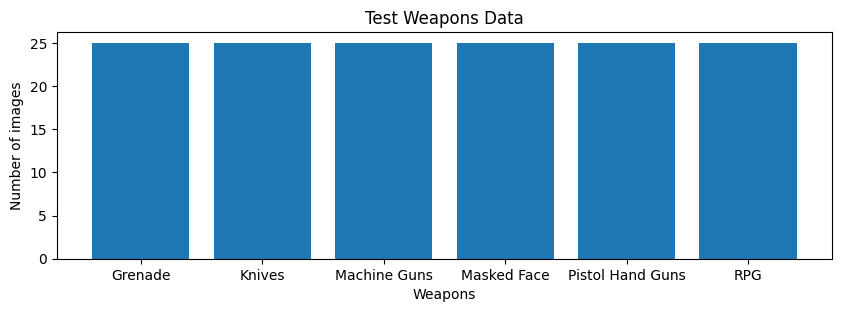

In [ ]:

#counting num files in each test subdir
list = os.listdir('Weapons/test/Grenade') # dir is your directory path
number_files = len(list)

list = os.listdir('Weapons/test/Knives') # dir is your directory path
number_files2 = len(list)

list = os.listdir('Weapons/test/Machine Guns') # dir is your directory path
number_files3 = len(list)

list = os.listdir('Weapons/test/Masked Face') # dir is your directory path
number_files4 = len(list)

list = os.listdir('Weapons/test/Pistol Hand Guns') # dir is your directory path
number_files5 = len(list)

list = os.listdir('Weapons/test/RPG') # dir is your directory path
number_files6 = len(list)

#defines x and y vars of test bar plot
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})
y = [number_files, number_files2, number_files3, number_files4, number_files5, number_files6]
x = ['Grenade', 'Knives', 'Machine Guns', 'Masked Face', 'Pistol Hand Guns', 'RPG']

#plotting test bar plot
plt.bar(x,y)
plt.xlabel('Weapons')
plt.ylabel("Number of images")
plt.title('Test Weapons Data')
plt.show()

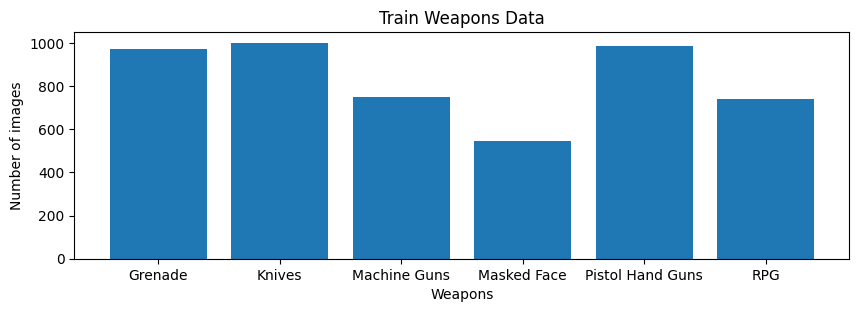

In [ ]:
#counting num files in each train subdir
list = os.listdir('Weapons/train/Grenade') # dir is your directory path
number_files = len(list)

list = os.listdir('Weapons/train/Knives') # dir is your directory path
number_files2 = len(list)

list = os.listdir('Weapons/train/Machine Guns') # dir is your directory path
number_files3 = len(list)

list = os.listdir('Weapons/train/Masked Face') # dir is your directory path
number_files4 = len(list)

list = os.listdir('Weapons/train/Pistol Hand Guns') # dir is your directory path
number_files5 = len(list)

list = os.listdir('Weapons/train/RPG') # dir is your directory path
number_files6 = len(list)

# x and y vars for bar plot
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})
y = [number_files, number_files2, number_files3, number_files4, number_files5, number_files6]
x = ['Grenade', 'Knives', 'Machine Guns', 'Masked Face', 'Pistol Hand Guns', 'RPG']
# plotting train bar plot
plt.bar(x,y)
plt.xlabel('Weapons')
plt.ylabel("Number of images")
plt.title('Train Weapons Data')
plt.show()

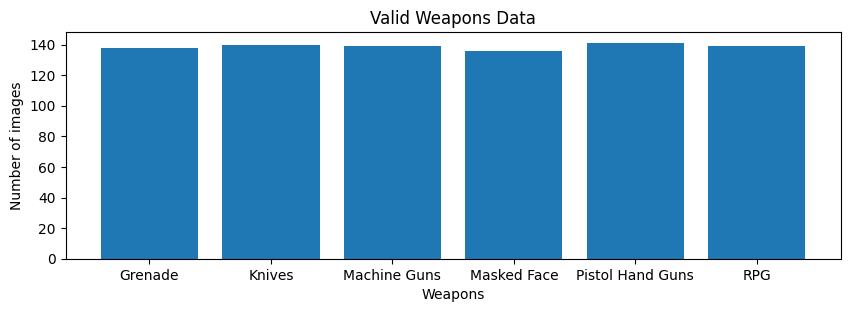

In [ ]:
#counting num files in each train subdir
list = os.listdir('Weapons/valid/Grenade') # dir is your directory path
number_files = len(list)

list = os.listdir('Weapons/valid/Knives') # dir is your directory path
number_files2 = len(list)

list = os.listdir('Weapons/valid/Machine Guns') # dir is your directory path
number_files3 = len(list)

list = os.listdir('Weapons/valid/Masked Face') # dir is your directory path
number_files4 = len(list)

list = os.listdir('Weapons/valid/Pistol Hand Guns') # dir is your directory path
number_files5 = len(list)

list = os.listdir('Weapons/valid/RPG') # dir is your directory path
number_files6 = len(list)

# x and y vars for bar plot
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})
y = [number_files, number_files2, number_files3, number_files4, number_files5, number_files6]
x = ['Grenade', 'Knives', 'Machine Guns', 'Masked Face', 'Pistol Hand Guns', 'RPG']
# plotting train bar plot
plt.bar(x,y)
plt.xlabel('Weapons')
plt.ylabel("Number of images")
plt.title('Valid Weapons Data')
plt.show()

## Creating Data Generators

In [ ]:
batch_size = 20
#creating image generator for train
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range = 0.2, # extent of shearing - 20%
    zoom_range = 0.2, # extent of adjusting the zoom in images - 20%
    horizontal_flip= True, # randomly flipping to get mirror images
    rotation_range=0.1,
    fill_mode='nearest')

#creating image gen for validation
validate_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range = 0.2, # extent of shearing - 20%
                                      zoom_range = 0.2, # extent of adjusting the zoom in images - 20%
                                      horizontal_flip= True, # randomly flipping to get mirror images
                                      rotation_range=0.1,
                                      fill_mode='nearest')

# creating image gen for testing
test_datagen = ImageDataGenerator(rescale=1./255)

#creates flow from train directory
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')

#creates flow from valid dir
validation_generator = validate_datagen.flow_from_directory(
        valid_dir,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical')

#Create a flow from the directory for testing data - seed=42
test_generator = test_datagen.flow_from_directory(test_dir,
                                              target_size=(256, 256),
                                              batch_size = batch_size,
                                              class_mode='categorical')

#assigns indices to classes --> grenade: 0, knives: 1, etc
class_dictionary = train_generator.class_indices
print(class_dictionary)


Found 4984 images belonging to 6 classes.
Found 833 images belonging to 6 classes.
Found 150 images belonging to 6 classes.
{'Grenade': 0, 'Knives': 1, 'Machine Guns': 2, 'Masked Face': 3, 'Pistol Hand Guns': 4, 'RPG': 5}


## Visualizing Data

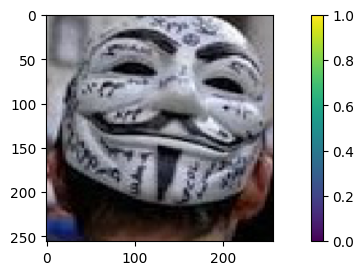

[0. 0. 0. 1. 0. 0.]


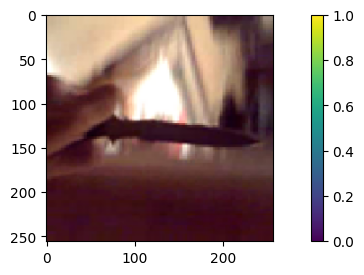

[0. 1. 0. 0. 0. 0.]


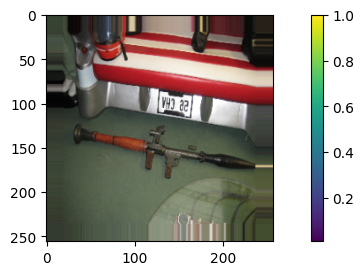

[0. 0. 0. 0. 0. 1.]


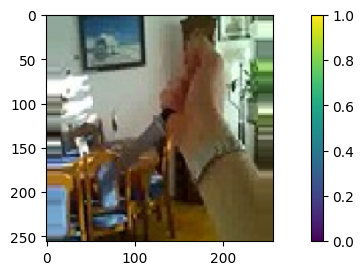

[0. 1. 0. 0. 0. 0.]


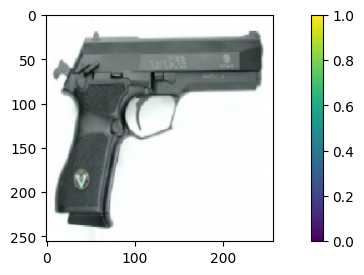

[0. 0. 0. 0. 1. 0.]


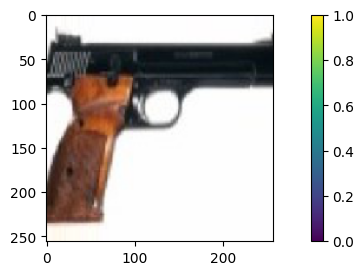

[0. 0. 0. 0. 1. 0.]


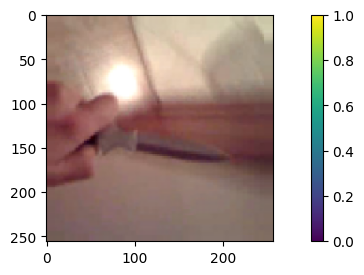

[0. 1. 0. 0. 0. 0.]


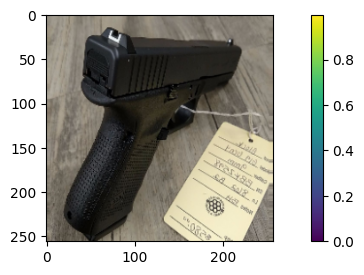

[0. 0. 0. 0. 1. 0.]


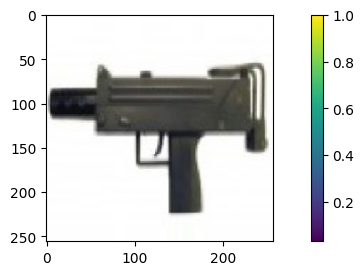

[0. 0. 0. 0. 1. 0.]


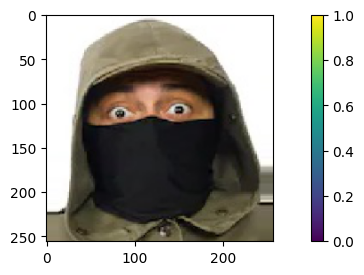

[0. 0. 0. 1. 0. 0.]


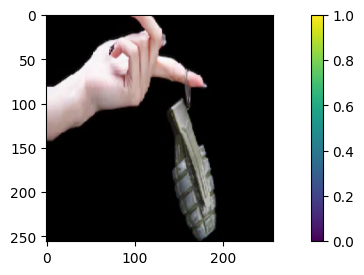

[1. 0. 0. 0. 0. 0.]


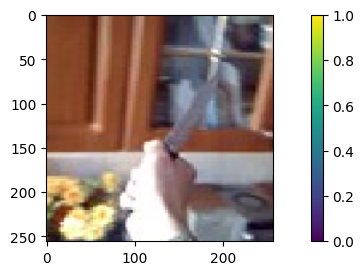

[0. 1. 0. 0. 0. 0.]


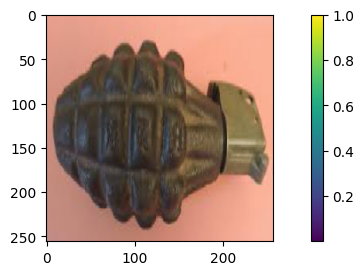

[1. 0. 0. 0. 0. 0.]


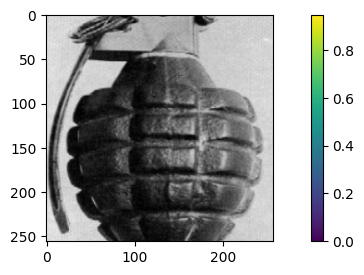

[1. 0. 0. 0. 0. 0.]


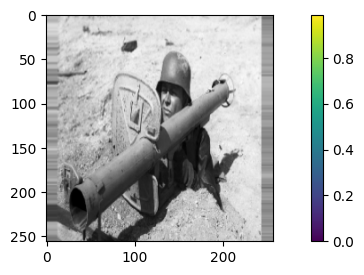

[0. 0. 0. 0. 0. 1.]


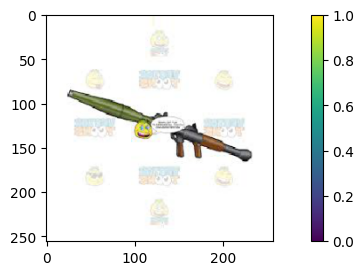

[0. 0. 0. 0. 0. 1.]


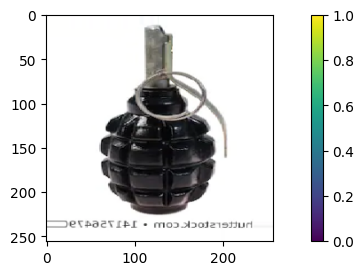

[1. 0. 0. 0. 0. 0.]


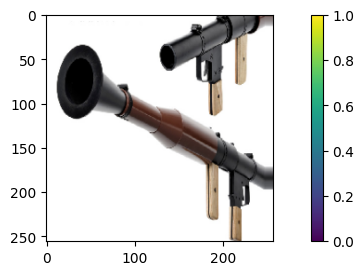

[0. 0. 0. 0. 0. 1.]


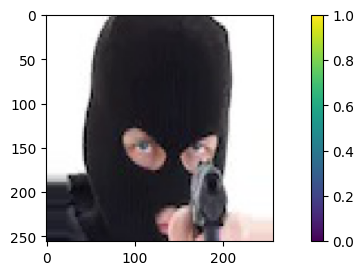

[0. 0. 0. 1. 0. 0.]


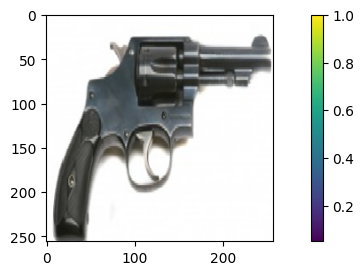

[0. 0. 0. 0. 1. 0.]


In [ ]:
#visualizing data
for my_batch in train_generator:
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(labels[i])
    break

Found 9348 images belonging to 6 classes.


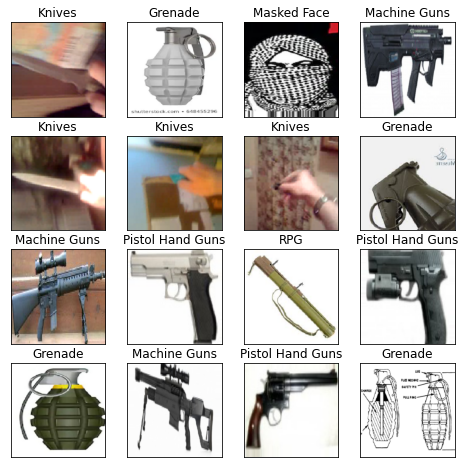

In [ ]:
#visualizing data
from keras.preprocessing import image

i = 0
figure = plt.figure(figsize=(8, 8))
columns = 4
rows = 4
ax = []

#loops over train dir images
for batch in train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 256x256
        target_size=(256, 256),
        batch_size=1,
        class_mode='categorical'):
    i += 1

    #maps label to image
    lbl_index = np.nonzero(batch[1][0] == 1)[0][0]
    label = list(class_dictionary.keys()) [list(class_dictionary.values()).index(lbl_index)]

    #adds label and image to ax array
    ax.append( figure.add_subplot(rows, columns, i) )

    #plt.imshow displays data as image and image.array_to_img converts a 3d numpy array to a pil image instance
    imgplot = plt.imshow(image.array_to_img(batch[0][0,:,:,:]))

    # set title
    ax[-1].set_title(label)

    if i % (columns*rows) == 0:
        break

#sets properties of an object --> here ax's x axis and y axis ticks should not be shown bc they're empty
plt.setp(ax, xticks=[], yticks=[])

plt.show()

## Building Overfitting Models

###Model 1 (91.52%; 79,106 params)

In [ ]:
model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 flatten_5 (Flatten)         (None, 2704)             

In [ ]:
##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

In [ ]:
##Train the model
history = model.fit(train_generator,epochs = 10)

Epoch 1/10
162/468 [=========>....................] - ETA: 3:14 - loss: 1.1399 - accuracy: 0.5905

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


468/468 [==============================] - 198s 419ms/step - loss: 0.8919 - accuracy: 0.6876
Epoch 2/10
468/468 [==============================] - 141s 301ms/step - loss: 0.5921 - accuracy: 0.7972
Epoch 3/10
468/468 [==============================] - 139s 297ms/step - loss: 0.4955 - accuracy: 0.8296
Epoch 4/10
468/468 [==============================] - 140s 298ms/step - loss: 0.4264 - accuracy: 0.8568
Epoch 5/10
468/468 [==============================] - 138s 296ms/step - loss: 0.3828 - accuracy: 0.8693
Epoch 6/10
468/468 [==============================] - 139s 298ms/step - loss: 0.3451 - accuracy: 0.8820
Epoch 7/10
468/468 [==============================] - 139s 296ms/step - loss: 0.3191 - accuracy: 0.8907
Epoch 8/10
468/468 [==============================] - 139s 298ms/step - loss: 0.2874 - accuracy: 0.9005
Epoch 9/10
468/468 [==============================] - 138s 295ms/step - loss: 0.2780 - accuracy: 0.9038
Epoch 10/10
468/468 [==============================] - 138s 295ms/step - lo

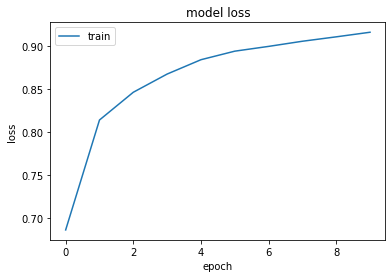

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

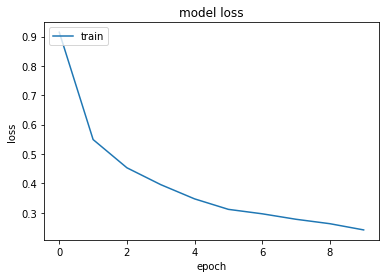

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

###Model 2 (90.02%; 33,866 params)

In [ ]:
model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 8, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 flatten (Flatten)           (None, 1352)              0

In [ ]:
##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

In [ ]:
##Train the model
history = model.fit(train_generator,epochs = 10)

Epoch 1/10
 72/468 [===>..........................] - ETA: 1:57 - loss: 1.3499 - accuracy: 0.4931

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


468/468 [==============================] - 154s 303ms/step - loss: 0.8631 - accuracy: 0.7027
Epoch 2/10
468/468 [==============================] - 142s 304ms/step - loss: 0.5912 - accuracy: 0.7947
Epoch 3/10
468/468 [==============================] - 147s 314ms/step - loss: 0.5031 - accuracy: 0.8257
Epoch 4/10
468/468 [==============================] - 145s 309ms/step - loss: 0.4364 - accuracy: 0.8538
Epoch 5/10
468/468 [==============================] - 143s 305ms/step - loss: 0.4025 - accuracy: 0.8593
Epoch 6/10
468/468 [==============================] - 142s 303ms/step - loss: 0.3671 - accuracy: 0.8746
Epoch 7/10
468/468 [==============================] - 141s 301ms/step - loss: 0.3427 - accuracy: 0.8843
Epoch 8/10
468/468 [==============================] - 140s 300ms/step - loss: 0.3288 - accuracy: 0.8864
Epoch 9/10
468/468 [==============================] - 142s 303ms/step - loss: 0.3125 - accuracy: 0.8953
Epoch 10/10
468/468 [==============================] - 141s 302ms/step - lo

dict_keys(['loss', 'accuracy'])


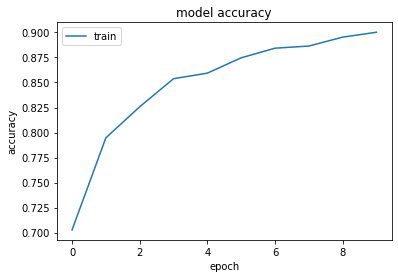

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

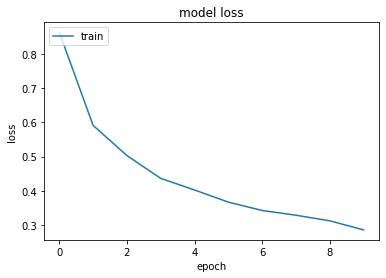

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

###Model 3 (90.81%; 69,994 params)

In [ ]:
model = Sequential()
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 flatten_4 (Flatten)         (None, 2704)             

In [ ]:
##Compile the model
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )

In [ ]:
##Train the model
history = model.fit(train_generator, steps_per_epoch = 300, epochs = 10)

Epoch 1/10
109/300 [=========>....................] - ETA: 57s - loss: 1.2487 - accuracy: 0.5569

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


300/300 [==============================] - 93s 310ms/step - loss: 0.9984 - accuracy: 0.6476
Epoch 2/10
300/300 [==============================] - 92s 306ms/step - loss: 0.6558 - accuracy: 0.7710
Epoch 3/10
300/300 [==============================] - 93s 310ms/step - loss: 0.5145 - accuracy: 0.8173
Epoch 4/10
300/300 [==============================] - 92s 305ms/step - loss: 0.4516 - accuracy: 0.8457
Epoch 5/10
300/300 [==============================] - 92s 307ms/step - loss: 0.4223 - accuracy: 0.8582
Epoch 6/10
300/300 [==============================] - 93s 309ms/step - loss: 0.3537 - accuracy: 0.8801
Epoch 7/10
300/300 [==============================] - 92s 306ms/step - loss: 0.3439 - accuracy: 0.8816
Epoch 8/10
300/300 [==============================] - 93s 311ms/step - loss: 0.3188 - accuracy: 0.8908
Epoch 9/10
300/300 [==============================] - 92s 307ms/step - loss: 0.2933 - accuracy: 0.8985
Epoch 10/10
300/300 [==============================] - 91s 302ms/step - loss: 0.2743

dict_keys(['loss', 'accuracy'])


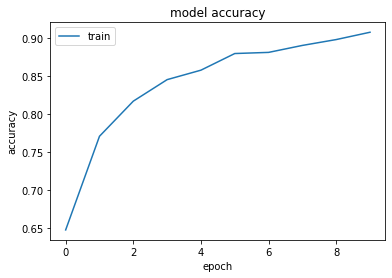

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

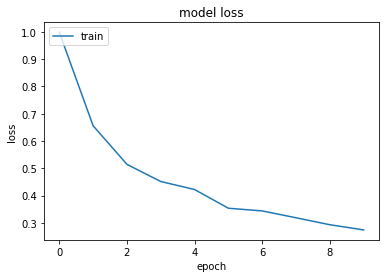

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Building a CNN

### Model 1

In [ ]:
model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )


model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 2704)              0

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=10)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =2), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 10, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/10
141/250 [===============>..............] - ETA: 39s - loss: 0.3037 - accuracy: 0.8948

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 100s 399ms/step - loss: 0.2846 - accuracy: 0.8995 - val_loss: 1.0618 - val_accuracy: 0.7275
Epoch 2/10
250/250 [==============================] - 92s 368ms/step - loss: 0.2553 - accuracy: 0.9087 - val_loss: 0.9671 - val_accuracy: 0.7479
Epoch 3/10
250/250 [==============================] - 90s 361ms/step - loss: 0.2438 - accuracy: 0.9155 - val_loss: 1.2975 - val_accuracy: 0.7143
Epoch 4/10
250/250 [==============================] - 91s 364ms/step - loss: 0.2376 - accuracy: 0.9193 - val_loss: 0.9869 - val_accuracy: 0.7575
Epoch 5/10
250/250 [==============================] - 90s 361ms/step - loss: 0.2239 - accuracy: 0.9228 - val_loss: 0.8672 - val_accuracy: 0.7527
Epoch 6/10
250/250 [==============================] - 91s 366ms/step - loss: 0.2106 - accuracy: 0.9242 - val_loss: 1.0033 - val_accuracy: 0.7479
Epoch 7/10
250/250 [==============================] - 90s 362ms/step - loss: 0.1932 - accuracy: 0.9338 - val_loss: 0.7618 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


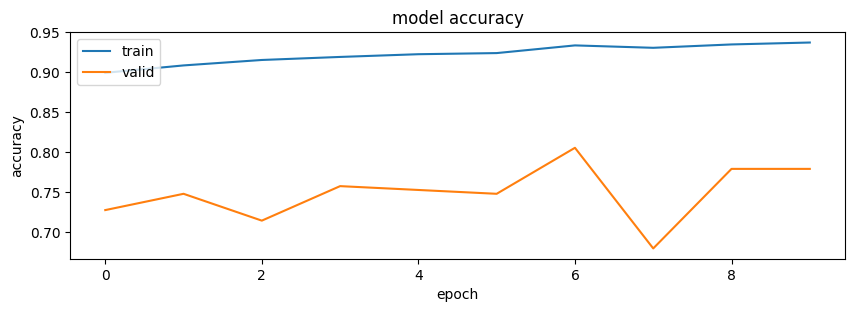

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

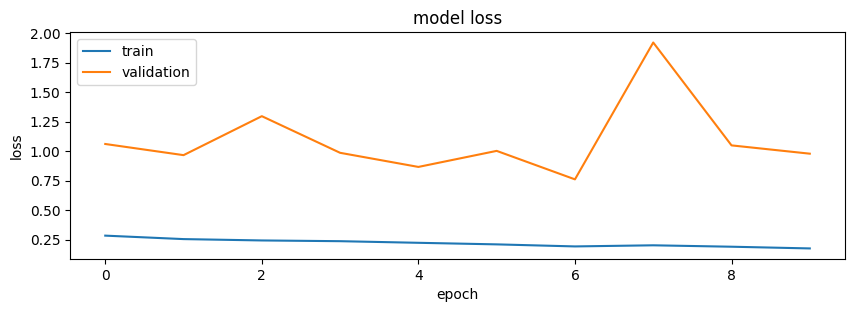

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.16757604479789734, 0.9428170323371887]

In [ ]:
# Prints out the valid model loss and accuracy
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.7694705128669739, 0.7983193397521973]

### Model 2

In [ ]:
model = Sequential()
model.add( Conv2D(512, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D(130, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D(100, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D(64, ( 3, 3 ), activation = 'relu' ) )

model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )


model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 130)       599170    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 130)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 100)       117100    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 100)        0

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=20)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =15), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 20, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/20
241/250 [===========================>..] - ETA: 3s - loss: 1.2552 - accuracy: 0.5044

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 128s 458ms/step - loss: 1.2381 - accuracy: 0.5122 - val_loss: 1.1414 - val_accuracy: 0.6026
Epoch 2/20
250/250 [==============================] - 113s 453ms/step - loss: 0.6759 - accuracy: 0.7586 - val_loss: 1.1426 - val_accuracy: 0.6267
Epoch 3/20
250/250 [==============================] - 111s 445ms/step - loss: 0.5486 - accuracy: 0.8060 - val_loss: 1.1480 - val_accuracy: 0.6711
Epoch 4/20
250/250 [==============================] - 111s 445ms/step - loss: 0.4703 - accuracy: 0.8313 - val_loss: 0.8760 - val_accuracy: 0.7251
Epoch 5/20
250/250 [==============================] - 111s 444ms/step - loss: 0.4170 - accuracy: 0.8523 - val_loss: 0.9536 - val_accuracy: 0.7299
Epoch 6/20
250/250 [==============================] - 111s 445ms/step - loss: 0.3727 - accuracy: 0.8702 - val_loss: 1.2508 - val_accuracy: 0.7215
Epoch 7/20
250/250 [==============================] - 111s 444ms/step - loss: 0.3399 - accuracy: 0.8812 - val_loss: 0.8931 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


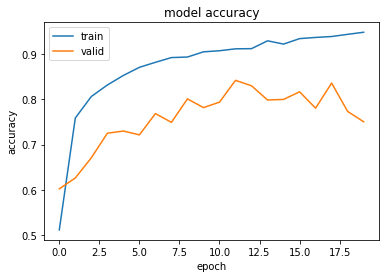

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


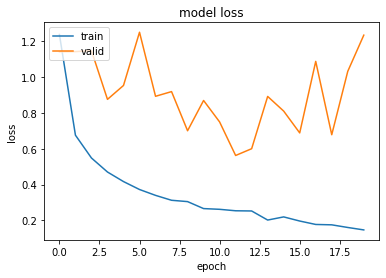

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.22475682199001312, 0.9185393452644348]

In [ ]:
# Prints out the valid model loss and accuracy
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.5606880784034729, 0.848739504814148]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.5515154004096985, 0.846666693687439]

### Model 3

In [ ]:
model = Sequential()
model.add( Conv2D(512, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D(130, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D(100, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D(64, ( 3, 3 ), activation = 'relu' ) )

model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )


model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 130)       599170    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 130)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 100)       117100    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 100)        0

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=10)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =2), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 30, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/30
 14/250 [>.............................] - ETA: 1:36 - loss: 1.8016 - accuracy: 0.1679

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 132s 475ms/step - loss: 1.1450 - accuracy: 0.5582 - val_loss: 1.0891 - val_accuracy: 0.6327
Epoch 2/30
250/250 [==============================] - 116s 464ms/step - loss: 0.6585 - accuracy: 0.7638 - val_loss: 1.1404 - val_accuracy: 0.6411
Epoch 3/30
250/250 [==============================] - 116s 464ms/step - loss: 0.5454 - accuracy: 0.8032 - val_loss: 0.9496 - val_accuracy: 0.7059
Epoch 4/30
250/250 [==============================] - 116s 465ms/step - loss: 0.4693 - accuracy: 0.8381 - val_loss: 1.1497 - val_accuracy: 0.6759
Epoch 5/30
250/250 [==============================] - 115s 460ms/step - loss: 0.4045 - accuracy: 0.8589 - val_loss: 1.3247 - val_accuracy: 0.6915
Epoch 6/30
250/250 [==============================] - 116s 463ms/step - loss: 0.3646 - accuracy: 0.8716 - val_loss: 1.1180 - val_accuracy: 0.7299
Epoch 7/30
250/250 [==============================] - 117s 467ms/step - loss: 0.3165 - accuracy: 0.8896 - val_loss: 0.8879 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


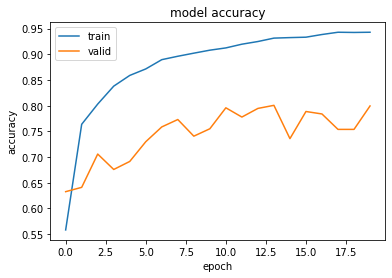

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


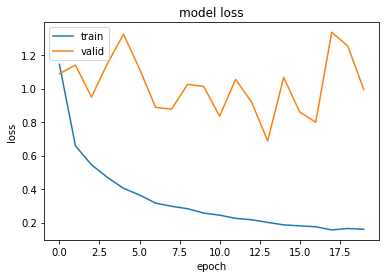

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.1650916039943695, 0.9410112500190735]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.726333737373352, 0.7935174107551575]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.5971279740333557, 0.8066666722297668]

### Model 4

In [ ]:
model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )


model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 2704)             

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=10)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =2), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 30, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/30
142/250 [================>.............] - ETA: 33s - loss: 1.2678 - accuracy: 0.5053

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 94s 371ms/step - loss: 1.0903 - accuracy: 0.5861 - val_loss: 1.3777 - val_accuracy: 0.5222
Epoch 2/30
250/250 [==============================] - 93s 374ms/step - loss: 0.6714 - accuracy: 0.7570 - val_loss: 1.0932 - val_accuracy: 0.6230
Epoch 3/30
250/250 [==============================] - 93s 371ms/step - loss: 0.5700 - accuracy: 0.7998 - val_loss: 1.0023 - val_accuracy: 0.6627
Epoch 4/30
250/250 [==============================] - 92s 368ms/step - loss: 0.4876 - accuracy: 0.8254 - val_loss: 0.9762 - val_accuracy: 0.7131
Epoch 5/30
250/250 [==============================] - 93s 371ms/step - loss: 0.4703 - accuracy: 0.8341 - val_loss: 1.0537 - val_accuracy: 0.6927
Epoch 6/30
250/250 [==============================] - 92s 367ms/step - loss: 0.4142 - accuracy: 0.8537 - val_loss: 1.0810 - val_accuracy: 0.6891
Epoch 7/30
250/250 [==============================] - 92s 366ms/step - loss: 0.3815 - accuracy: 0.8634 - val_loss: 1.0470 - val_accuracy: 0.6

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


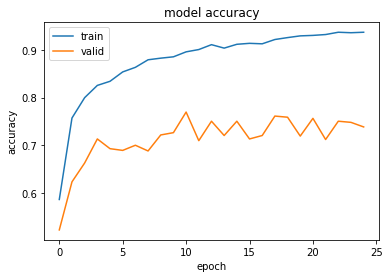

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


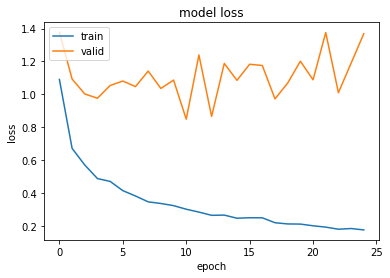

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.28290802240371704, 0.9042937159538269]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.8850024342536926, 0.7539015412330627]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.7634000778198242, 0.7933333516120911]

### Model 5

In [ ]:
model = Sequential()
model.add( Conv2D( 128, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )


model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 64)        

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=10)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =2), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 20, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/20
137/250 [===============>..............] - ETA: 37s - loss: 1.5366 - accuracy: 0.3576

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 110s 390ms/step - loss: 1.2975 - accuracy: 0.4843 - val_loss: 1.1684 - val_accuracy: 0.5606
Epoch 2/20
250/250 [==============================] - 96s 384ms/step - loss: 0.7371 - accuracy: 0.7315 - val_loss: 1.1077 - val_accuracy: 0.6615
Epoch 3/20
250/250 [==============================] - 95s 379ms/step - loss: 0.5881 - accuracy: 0.7861 - val_loss: 1.1130 - val_accuracy: 0.6639
Epoch 4/20
250/250 [==============================] - 96s 383ms/step - loss: 0.5196 - accuracy: 0.8128 - val_loss: 1.1917 - val_accuracy: 0.6651
Epoch 5/20
250/250 [==============================] - 95s 379ms/step - loss: 0.4522 - accuracy: 0.8401 - val_loss: 0.9017 - val_accuracy: 0.7263
Epoch 6/20
250/250 [==============================] - 94s 377ms/step - loss: 0.4067 - accuracy: 0.8571 - val_loss: 1.1334 - val_accuracy: 0.6843
Epoch 7/20
250/250 [==============================] - 95s 379ms/step - loss: 0.3809 - accuracy: 0.8632 - val_loss: 0.9339 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


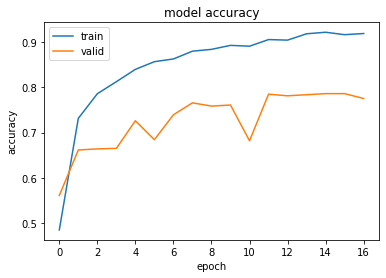

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


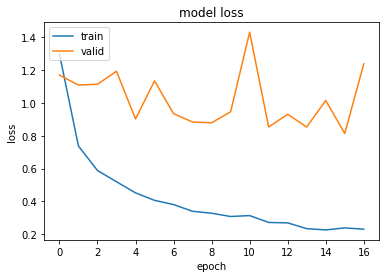

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.2444210648536682, 0.908908486366272]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.8145396113395691, 0.7827130556106567]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.8738082647323608, 0.753333330154419]

### Model 6

In [ ]:
model = Sequential()
model.add( Conv2D( 128, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )


model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=20)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =15), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 30, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/30
107/250 [===========>..................] - ETA: 1:01 - loss: 1.6155 - accuracy: 0.2991

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 119s 426ms/step - loss: 1.2434 - accuracy: 0.5034 - val_loss: 1.2383 - val_accuracy: 0.5486
Epoch 2/30
250/250 [==============================] - 93s 374ms/step - loss: 0.6876 - accuracy: 0.7632 - val_loss: 1.4444 - val_accuracy: 0.6014
Epoch 3/30
250/250 [==============================] - 92s 368ms/step - loss: 0.5637 - accuracy: 0.8016 - val_loss: 0.9630 - val_accuracy: 0.6951
Epoch 4/30
250/250 [==============================] - 92s 367ms/step - loss: 0.4797 - accuracy: 0.8313 - val_loss: 0.9731 - val_accuracy: 0.7167
Epoch 5/30
250/250 [==============================] - 93s 371ms/step - loss: 0.4266 - accuracy: 0.8509 - val_loss: 0.7947 - val_accuracy: 0.7515
Epoch 6/30
250/250 [==============================] - 92s 369ms/step - loss: 0.3796 - accuracy: 0.8666 - val_loss: 0.9358 - val_accuracy: 0.7419
Epoch 7/30
250/250 [==============================] - 94s 375ms/step - loss: 0.3523 - accuracy: 0.8742 - val_loss: 0.9632 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


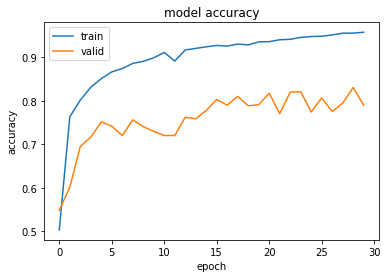

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


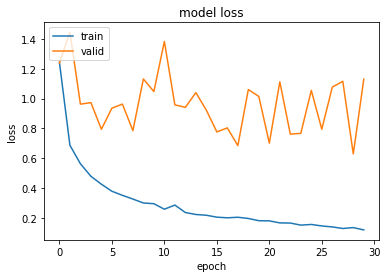

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.12497341632843018, 0.959069013595581]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.630473256111145, 0.8415366411209106]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.9575035572052002, 0.7933333516120911]

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/Grenade/1226.jpg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand gun', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

grenade


###Model 7

In [ ]:
model = Sequential()
model.add( Conv2D( 128, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )


model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=10)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =2), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 40, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/40
201/250 [=======================>......] - ETA: 16s - loss: 1.3036 - accuracy: 0.4923

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 103s 412ms/step - loss: 1.2171 - accuracy: 0.5309 - val_loss: 1.0677 - val_accuracy: 0.5894
Epoch 2/40
250/250 [==============================] - 93s 370ms/step - loss: 0.7478 - accuracy: 0.7277 - val_loss: 1.1692 - val_accuracy: 0.6242
Epoch 3/40
250/250 [==============================] - 94s 375ms/step - loss: 0.6094 - accuracy: 0.7811 - val_loss: 1.0280 - val_accuracy: 0.6699
Epoch 4/40
250/250 [==============================] - 92s 369ms/step - loss: 0.5458 - accuracy: 0.8006 - val_loss: 0.9854 - val_accuracy: 0.6867
Epoch 5/40
250/250 [==============================] - 92s 368ms/step - loss: 0.4956 - accuracy: 0.8232 - val_loss: 1.1024 - val_accuracy: 0.6771
Epoch 6/40
250/250 [==============================] - 92s 370ms/step - loss: 0.4504 - accuracy: 0.8357 - val_loss: 0.9507 - val_accuracy: 0.7275
Epoch 7/40
250/250 [==============================] - 93s 371ms/step - loss: 0.4094 - accuracy: 0.8559 - val_loss: 0.8920 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


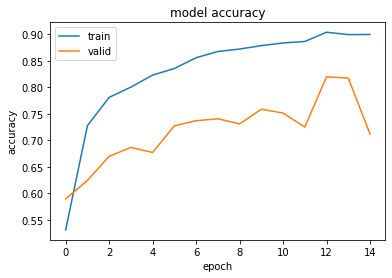

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


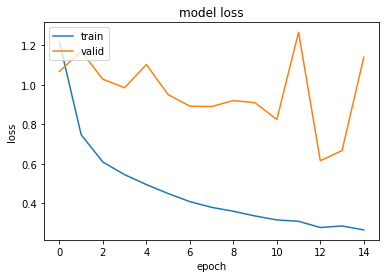

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.2726231515407562, 0.9105136394500732]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.6288219094276428, 0.8103241324424744]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.6839795708656311, 0.8333333134651184]

###Model 8

In [ ]:
model = Sequential()
model.add( Conv2D( 128, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )


model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 3, 3, 64)       

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=10)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =2), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 25, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/25
236/250 [===========================>..] - ETA: 4s - loss: 0.2865 - accuracy: 0.8967

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 97s 387ms/step - loss: 0.2880 - accuracy: 0.8973 - val_loss: 0.9009 - val_accuracy: 0.7779
Epoch 2/25
250/250 [==============================] - 96s 382ms/step - loss: 0.2850 - accuracy: 0.9025 - val_loss: 1.2088 - val_accuracy: 0.7359
Epoch 3/25
250/250 [==============================] - 96s 384ms/step - loss: 0.2790 - accuracy: 0.8991 - val_loss: 0.8598 - val_accuracy: 0.7683
Epoch 4/25
250/250 [==============================] - 96s 386ms/step - loss: 0.2559 - accuracy: 0.9089 - val_loss: 1.1566 - val_accuracy: 0.7275
Epoch 5/25
250/250 [==============================] - 97s 389ms/step - loss: 0.2583 - accuracy: 0.9085 - val_loss: 0.8432 - val_accuracy: 0.7875
Epoch 6/25
250/250 [==============================] - 97s 388ms/step - loss: 0.2258 - accuracy: 0.9199 - val_loss: 0.9724 - val_accuracy: 0.7551
Epoch 7/25
250/250 [==============================] - 96s 385ms/step - loss: 0.2181 - accuracy: 0.9211 - val_loss: 1.0567 - val_accuracy: 0.7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


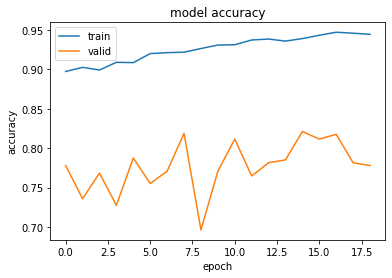

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


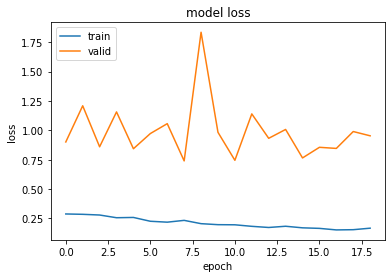

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.21992558240890503, 0.9223515391349792]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.7274271249771118, 0.8175269961357117]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.5442469120025635, 0.8399999737739563]

### Model 9

In [ ]:
model = Sequential()
model.add( Conv2D(128, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(6, 6) )
model.add( Conv2D(64, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(6, 6) )
model.add( Conv2D(32, ( 3, 3 ), activation = 'relu' ) )

model.add( Flatten() )
#sends output from one layer to the next
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )

model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 42, 42, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 40, 40, 64)        73792     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 flatten_6 (Flatten)         (None, 512)             

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=10)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =2), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 10, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/10
248/250 [============================>.] - ETA: 0s - loss: 1.1611 - accuracy: 0.5380

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 99s 392ms/step - loss: 1.1575 - accuracy: 0.5397 - val_loss: 1.2660 - val_accuracy: 0.5366
Epoch 2/10
250/250 [==============================] - 96s 383ms/step - loss: 0.6818 - accuracy: 0.7536 - val_loss: 1.5868 - val_accuracy: 0.5630
Epoch 3/10
250/250 [==============================] - 96s 383ms/step - loss: 0.5597 - accuracy: 0.7951 - val_loss: 1.0737 - val_accuracy: 0.6351
Epoch 4/10
250/250 [==============================] - 96s 384ms/step - loss: 0.4844 - accuracy: 0.8244 - val_loss: 0.9560 - val_accuracy: 0.6483
Epoch 5/10
250/250 [==============================] - 97s 387ms/step - loss: 0.4357 - accuracy: 0.8483 - val_loss: 1.1229 - val_accuracy: 0.6723
Epoch 6/10
250/250 [==============================] - 95s 381ms/step - loss: 0.3869 - accuracy: 0.8642 - val_loss: 0.9648 - val_accuracy: 0.6891
Epoch 7/10
250/250 [==============================] - 103s 413ms/step - loss: 0.3437 - accuracy: 0.8748 - val_loss: 1.2713 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


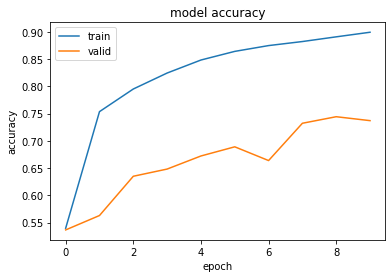

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


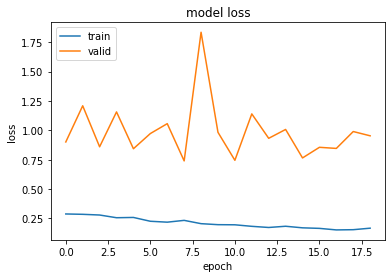

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.2793717682361603, 0.9030898809432983]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.8257832527160645, 0.7478991746902466]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.7155144214630127, 0.8066666722297668]

### Model 10

In [ ]:
model = Sequential()
model.add( Conv2D(128, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(6, 6) )
model.add( Conv2D(64, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 3)) )
model.add( MaxPool2D(6, 6) )
model.add( Conv2D(32, ( 3, 3 ), activation = 'relu' ) )

model.add( Flatten() )
#sends output from one layer to the next
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 6, activation = 'softmax' ) )

model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 42, 42, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 40, 40, 64)        73792     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 flatten_14 (Flatten)        (None, 512)             

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=10)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =2), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
# Saving the history of training epochs and associated metrics to a variable (history)
history = model.fit(train_generator,epochs = 20, validation_data= validation_generator, callbacks = callbacks_list)

Epoch 1/20
 97/250 [==========>...................] - ETA: 50s - loss: 0.1961 - accuracy: 0.9320

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 98s 393ms/step - loss: 0.2169 - accuracy: 0.9226 - val_loss: 1.1977 - val_accuracy: 0.7395
Epoch 2/20
250/250 [==============================] - 97s 390ms/step - loss: 0.1924 - accuracy: 0.9304 - val_loss: 0.9313 - val_accuracy: 0.7923
Epoch 3/20
250/250 [==============================] - 98s 390ms/step - loss: 0.1813 - accuracy: 0.9368 - val_loss: 1.2055 - val_accuracy: 0.7503
Epoch 4/20
250/250 [==============================] - 97s 388ms/step - loss: 0.1760 - accuracy: 0.9388 - val_loss: 1.4860 - val_accuracy: 0.7419
Epoch 5/20
250/250 [==============================] - 97s 388ms/step - loss: 0.1769 - accuracy: 0.9352 - val_loss: 1.4551 - val_accuracy: 0.7455
Epoch 6/20
250/250 [==============================] - 96s 384ms/step - loss: 0.1939 - accuracy: 0.9342 - val_loss: 1.4374 - val_accuracy: 0.7299


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


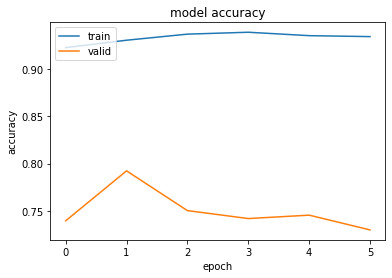

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


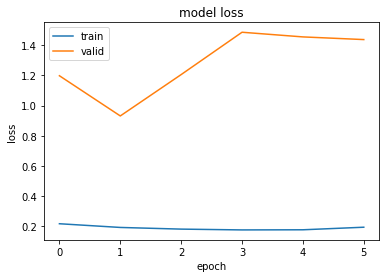

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
model.load_weights('model.h5')
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.2231820970773697, 0.9225521683692932]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.7411815524101257, 0.8163265585899353]

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.5442469120025635, 0.8399999737739563]

# Transfer Learning


##VGG16


### Model 1


In [ ]:
# libraries for pretrained models
from keras.applications.vgg16 import VGG16

from keras.models import Sequential, Model

# loading the pretrained model
vgg_pre_trained_model = VGG16(input_shape= (256, 256, 3),
                              include_top = False,
                              weights = 'imagenet',
                              pooling='avg')

# freezing parameters in convolutional layers
for layer in vgg_pre_trained_model.layers:
    layer.trainable = False

vgg_pre_trained_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
# building the model
def build_my_model(model_name):

    new_model = Sequential()
    model = vgg_pre_trained_model
    # Add the convolutional part of the nasnet model from above.
    new_model.add(model)
    # Create a custom classifier
    new_model.add(Flatten())
    new_model.add(Dense(20, activation='relu'))
    new_model.add(Dropout(0.4))
    new_model.add(Dense(6, activation='softmax'))


    return new_model
# building nasnet model
my_vgg_model = build_my_model(vgg_pre_trained_model)

# building resnet model
# my_resnet_model = build_my_model(resnet_pre_trained_model)

my_vgg_model.summary()
my_model = my_vgg_model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 20)                10260     
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 6)                 126       
                                                                 
Total params: 14,725,074
Trainable params: 10,386
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=20)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =15), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 10 ,
                          callbacks = callbacks_list)

Epoch 1/10
104/250 [===========>..................] - ETA: 52s - loss: 1.5054 - accuracy: 0.4356

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 108s 429ms/step - loss: 1.2461 - accuracy: 0.5459 - val_loss: 1.0264 - val_accuracy: 0.6735
Epoch 2/10
250/250 [==============================] - 105s 418ms/step - loss: 0.7886 - accuracy: 0.7269 - val_loss: 0.7620 - val_accuracy: 0.7707
Epoch 3/10
250/250 [==============================] - 105s 419ms/step - loss: 0.6644 - accuracy: 0.7586 - val_loss: 0.6597 - val_accuracy: 0.7959
Epoch 4/10
250/250 [==============================] - 103s 413ms/step - loss: 0.5751 - accuracy: 0.7843 - val_loss: 0.5821 - val_accuracy: 0.8103
Epoch 5/10
250/250 [==============================] - 108s 431ms/step - loss: 0.5247 - accuracy: 0.8002 - val_loss: 0.5428 - val_accuracy: 0.8187
Epoch 6/10
250/250 [==============================] - 110s 439ms/step - loss: 0.4975 - accuracy: 0.8094 - val_loss: 0.4761 - val_accuracy: 0.8439
Epoch 7/10
250/250 [==============================] - 104s 418ms/step - loss: 0.4583 - accuracy: 0.8274 - val_loss: 0.4464 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


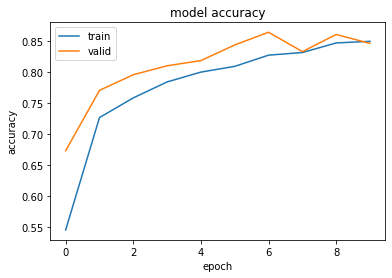

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

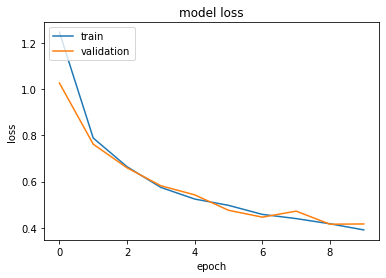

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.19737382233142853, 0.942415714263916]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.4095383882522583, 0.866746723651886]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.5964488983154297, 0.7799999713897705]

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/Grenade/1226.jpg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand gun', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

grenade


###Model 2


In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 20 ,
                          callbacks = callbacks_list)

Epoch 1/20
137/250 [===============>..............] - ETA: 40s - loss: 0.3938 - accuracy: 0.8539

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 106s 419ms/step - loss: 0.3947 - accuracy: 0.8561 - val_loss: 0.4398 - val_accuracy: 0.8463
Epoch 2/20
250/250 [==============================] - 111s 445ms/step - loss: 0.3846 - accuracy: 0.8559 - val_loss: 0.4077 - val_accuracy: 0.8571
Epoch 3/20
250/250 [==============================] - 104s 415ms/step - loss: 0.3659 - accuracy: 0.8660 - val_loss: 0.4107 - val_accuracy: 0.8631
Epoch 4/20
250/250 [==============================] - 104s 414ms/step - loss: 0.3724 - accuracy: 0.8612 - val_loss: 0.3799 - val_accuracy: 0.8703
Epoch 5/20
250/250 [==============================] - 103s 411ms/step - loss: 0.3494 - accuracy: 0.8690 - val_loss: 0.3876 - val_accuracy: 0.8607
Epoch 6/20
250/250 [==============================] - 103s 411ms/step - loss: 0.3418 - accuracy: 0.8756 - val_loss: 0.3899 - val_accuracy: 0.8595
Epoch 7/20
250/250 [==============================] - 103s 413ms/step - loss: 0.3175 - accuracy: 0.8850 - val_loss: 0.3544 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


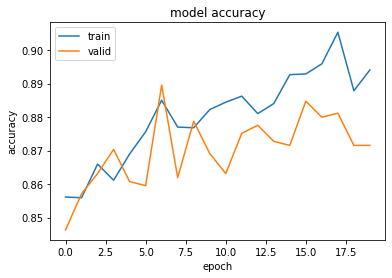

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

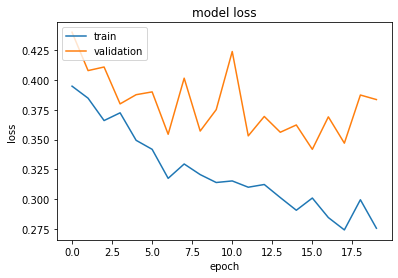

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.12293030321598053, 0.9616773724555969]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.3514021039009094, 0.8763505220413208]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.7819966673851013, 0.800000011920929]

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/Grenade/1226.jpg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand gun', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

grenade


###Model 3

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 30 ,
                          callbacks = callbacks_list)

Epoch 1/30
 19/250 [=>............................] - ETA: 1:17 - loss: 0.3066 - accuracy: 0.8956

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 174s 696ms/step - loss: 0.2999 - accuracy: 0.8846 - val_loss: 0.3784 - val_accuracy: 0.8824
Epoch 2/30
250/250 [==============================] - 103s 414ms/step - loss: 0.2868 - accuracy: 0.8878 - val_loss: 0.3373 - val_accuracy: 0.8812
Epoch 3/30
250/250 [==============================] - 103s 414ms/step - loss: 0.2790 - accuracy: 0.8975 - val_loss: 0.3230 - val_accuracy: 0.8932
Epoch 4/30
250/250 [==============================] - 103s 411ms/step - loss: 0.2815 - accuracy: 0.8904 - val_loss: 0.3590 - val_accuracy: 0.8727
Epoch 5/30
250/250 [==============================] - 103s 411ms/step - loss: 0.2744 - accuracy: 0.8973 - val_loss: 0.3847 - val_accuracy: 0.8643
Epoch 6/30
250/250 [==============================] - 103s 412ms/step - loss: 0.2914 - accuracy: 0.8878 - val_loss: 0.3818 - val_accuracy: 0.8667
Epoch 7/30
250/250 [==============================] - 102s 407ms/step - loss: 0.2699 - accuracy: 0.8995 - val_loss: 0.3405 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


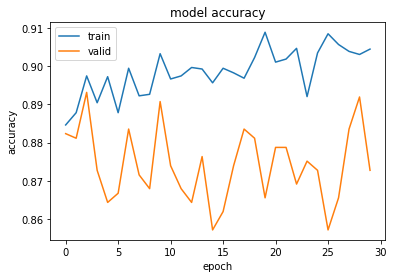

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

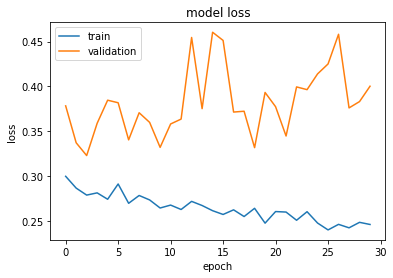

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.11068837344646454, 0.966091513633728]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.3464062511920929, 0.8811524510383606]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.758482813835144, 0.800000011920929]

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/Grenade/1226.jpg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand gun', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

grenade


###Model 4

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 40 ,
                          callbacks = callbacks_list)

Epoch 1/40
199/250 [======================>.......] - ETA: 17s - loss: 0.2691 - accuracy: 0.8983

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 104s 412ms/step - loss: 0.2732 - accuracy: 0.8973 - val_loss: 0.3847 - val_accuracy: 0.8776
Epoch 2/40
250/250 [==============================] - 104s 416ms/step - loss: 0.2780 - accuracy: 0.8939 - val_loss: 0.4120 - val_accuracy: 0.8691
Epoch 3/40
250/250 [==============================] - 103s 412ms/step - loss: 0.2711 - accuracy: 0.8945 - val_loss: 0.3926 - val_accuracy: 0.8800
Epoch 4/40
250/250 [==============================] - 103s 411ms/step - loss: 0.2696 - accuracy: 0.8973 - val_loss: 0.3719 - val_accuracy: 0.8703
Epoch 5/40
250/250 [==============================] - 103s 410ms/step - loss: 0.2640 - accuracy: 0.8965 - val_loss: 0.3371 - val_accuracy: 0.8884
Epoch 6/40
250/250 [==============================] - 103s 411ms/step - loss: 0.2794 - accuracy: 0.8864 - val_loss: 0.3840 - val_accuracy: 0.8631
Epoch 7/40
250/250 [==============================] - 102s 409ms/step - loss: 0.2713 - accuracy: 0.8947 - val_loss: 0.3583 - val_accura

KeyboardInterrupt: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


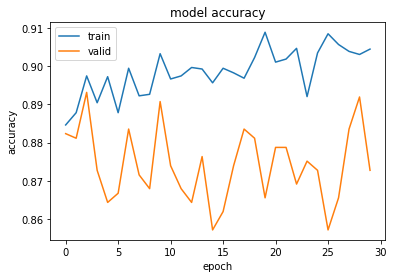

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

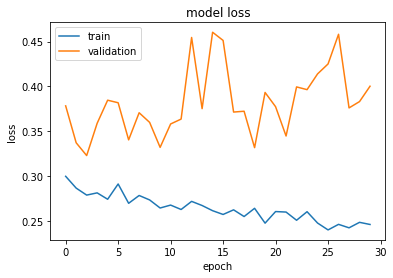

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.11244423687458038, 0.9622793197631836]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.32957449555397034, 0.8835534453392029]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.758482813835144, 0.800000011920929]

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img

model = load_model('model.h5')

image = load_img('Weapons/test/Grenade/1226.jpg', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)
label = model.predict_generator(img)
print(label[0][0])


0.99999666


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/Grenade/1226.jpg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand guns', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

grenade


##Inception V3

###Model 1

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential, Model

# loading the pretrained model
inception_pre_trained_model = InceptionV3(input_shape = (256,256,3),
                                 include_top = False,
                                 weights = 'imagenet')

# freezing parameters in convolutional layers
for layer in inception_pre_trained_model.layers:
    layer.trainable = False

inception_pre_trained_model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
# building the model
def build_my_model(model_name):

    new_model = Sequential()
    model = inception_pre_trained_model
    # Add the convolutional part of the inception v3 model from above.
    new_model.add(model)
    # Create a custom classifier
    new_model.add(Flatten())
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.4))
    new_model.add(Dense(6, activation='sigmoid'))
    #softmax

    return new_model
# building inceptionnet model
my_inception_model = build_my_model(inception_pre_trained_model)


my_inception_model.summary()
my_model = my_inception_model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 256)               18874624  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 40,678,950
Trainable params: 18,876,166
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=20)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =15), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 10 ,
                          callbacks = callbacks_list)

Epoch 1/10
143/250 [================>.............] - ETA: 33s - loss: 2.7676 - accuracy: 0.8470

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 102s 391ms/step - loss: 1.7490 - accuracy: 0.8652 - val_loss: 0.4191 - val_accuracy: 0.8932
Epoch 2/10
250/250 [==============================] - 95s 380ms/step - loss: 0.2734 - accuracy: 0.9163 - val_loss: 0.2015 - val_accuracy: 0.9412
Epoch 3/10
250/250 [==============================] - 95s 380ms/step - loss: 0.2713 - accuracy: 0.9189 - val_loss: 0.2677 - val_accuracy: 0.9304
Epoch 4/10
250/250 [==============================] - 95s 379ms/step - loss: 0.2472 - accuracy: 0.9205 - val_loss: 0.2063 - val_accuracy: 0.9448
Epoch 5/10
250/250 [==============================] - 94s 374ms/step - loss: 0.2276 - accuracy: 0.9300 - val_loss: 0.3492 - val_accuracy: 0.8980
Epoch 6/10
250/250 [==============================] - 96s 385ms/step - loss: 0.2066 - accuracy: 0.9350 - val_loss: 0.1845 - val_accuracy: 0.9412
Epoch 7/10
250/250 [==============================] - 94s 375ms/step - loss: 0.1704 - accuracy: 0.9444 - val_loss: 0.3058 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


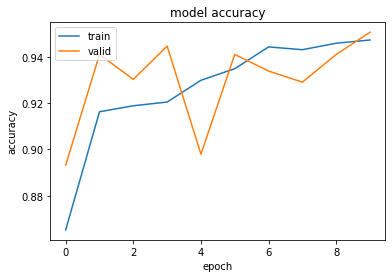

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

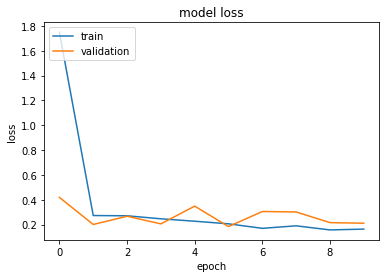

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.06144501268863678, 0.9797351360321045]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.19740450382232666, 0.9435774087905884]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.4763026833534241, 0.8799999952316284]

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img

image = load_img('Weapons/test/Knives/3535.jpg', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)

model = load_model('model.h5')

label = model.predict(img)
print(label)


3.7559906e-09


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/RPG/948.jpg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand guns', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

rpg


###Model 2

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 20 ,
                          callbacks = callbacks_list)

Epoch 1/20
157/250 [=================>............] - ETA: 30s - loss: 2.7248 - accuracy: 0.8459

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 117s 406ms/step - loss: 1.8334 - accuracy: 0.8666 - val_loss: 0.4811 - val_accuracy: 0.8776
Epoch 2/20
250/250 [==============================] - 98s 392ms/step - loss: 0.3028 - accuracy: 0.9123 - val_loss: 0.3538 - val_accuracy: 0.9160
Epoch 3/20
250/250 [==============================] - 97s 390ms/step - loss: 0.2969 - accuracy: 0.9107 - val_loss: 0.1836 - val_accuracy: 0.9424
Epoch 4/20
250/250 [==============================] - 97s 389ms/step - loss: 0.2525 - accuracy: 0.9203 - val_loss: 0.3699 - val_accuracy: 0.9016
Epoch 5/20
250/250 [==============================] - 97s 388ms/step - loss: 0.2409 - accuracy: 0.9226 - val_loss: 0.2530 - val_accuracy: 0.9400
Epoch 6/20
250/250 [==============================] - 98s 391ms/step - loss: 0.2188 - accuracy: 0.9348 - val_loss: 0.1546 - val_accuracy: 0.9436
Epoch 7/20
250/250 [==============================] - 98s 391ms/step - loss: 0.2195 - accuracy: 0.9344 - val_loss: 0.2716 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


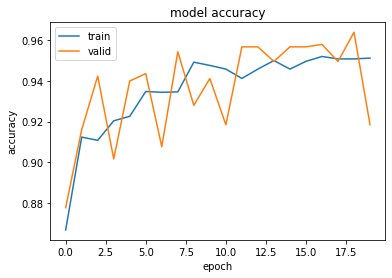

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

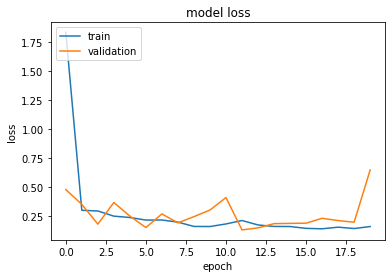

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.062429431825876236, 0.9773274660110474]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.1677502542734146, 0.9471789002418518]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.9119897484779358, 0.8733333349227905]

In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/RPG/948.jpg'

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand guns', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

rpg


###Model 3

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 30 ,
                          callbacks = callbacks_list)

Epoch 1/30
226/250 [==========================>...] - ETA: 7s - loss: 0.9094 - accuracy: 0.8663

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 106s 401ms/step - loss: 0.8615 - accuracy: 0.8670 - val_loss: 0.2141 - val_accuracy: 0.9364
Epoch 2/30
250/250 [==============================] - 98s 392ms/step - loss: 0.3513 - accuracy: 0.8981 - val_loss: 0.2141 - val_accuracy: 0.9352
Epoch 3/30
250/250 [==============================] - 97s 387ms/step - loss: 0.3159 - accuracy: 0.9035 - val_loss: 0.1832 - val_accuracy: 0.9496
Epoch 4/30
250/250 [==============================] - 95s 378ms/step - loss: 0.2830 - accuracy: 0.9161 - val_loss: 0.3793 - val_accuracy: 0.9088
Epoch 5/30
250/250 [==============================] - 95s 380ms/step - loss: 0.2211 - accuracy: 0.9290 - val_loss: 0.1876 - val_accuracy: 0.9568
Epoch 6/30
250/250 [==============================] - 96s 383ms/step - loss: 0.2329 - accuracy: 0.9268 - val_loss: 0.2322 - val_accuracy: 0.9580
Epoch 7/30
250/250 [==============================] - 96s 383ms/step - loss: 0.2170 - accuracy: 0.9332 - val_loss: 0.1472 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


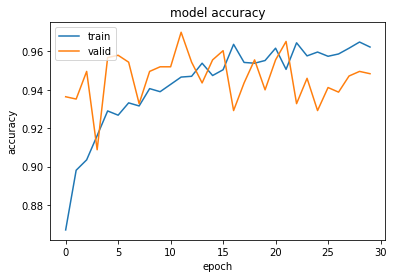

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

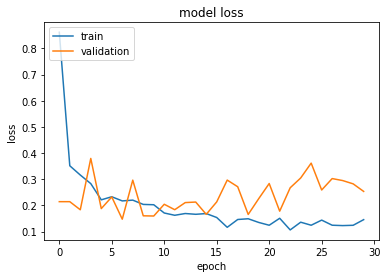

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.062178198248147964, 0.9807383418083191]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.1812935769557953, 0.9411764740943909]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.7642144560813904, 0.8533333539962769]

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img

image = load_img('Weapons/test/Knives/3535.jpg', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)

model = load_model('model.h5')

label = model.predict(img)
print(label)


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/RPG/948.jpg'

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand guns', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

rpg


## MobileNet

###Model 1

In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.models import Sequential, Model

# loading the pretrained model
mobile_pre_trained_model = MobileNet(input_shape = (256,256,3),
                                 include_top = False,
                                 weights = 'imagenet')

# freezing parameters in convolutional layers
for layer in mobile_pre_trained_model.layers:
    layer.trainable = False

mobile_pre_trained_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 128, 128, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 128, 128, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 128, 128, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 128, 128, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 128, 128, 32

In [ ]:
# building the model
def build_my_model(model_name):

    new_model = Sequential()
    model = mobile_pre_trained_model
    # Add the convolutional part of the mobilenet model from above.
    new_model.add(model)
    # Create a custom classifier
    new_model.add(Flatten())
    new_model.add(Dense(256, activation='relu'))
    new_model.add(Dropout(0.4))
    new_model.add(Dense(6, activation='softmax'))
    #softmax

    return new_model
# building mobilenet model
my_mobile_model = build_my_model(mobile_pre_trained_model)


my_mobile_model.summary()
my_model = my_mobile_model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 8, 8, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 256)               16777472  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 20,007,878
Trainable params: 16,779,014
Non-trainable params: 3,228,864
__________________________________

In [ ]:
# define hyperparameters
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="{}_my_model.bestv.hdf5".format('class')

# save the weights of the best model during training
checkpoint = ModelCheckpoint(model_path,
                              monitor= 'val_loss',
                              verbose=1,
                              save_best_only=True,
                              mode= 'auto',
                              save_weights_only = True)

# if results have not improved after a certain number of epochs, stop training.
early = EarlyStopping(monitor= 'val_loss',
                       mode= 'auto',
                       patience=20)
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience =15), tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',
                                                                                                                   monitor='val_loss',save_best_only=True,)]

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 10 ,
                          callbacks = callbacks_list)

Epoch 1/10
193/250 [======================>.......] - ETA: 18s - loss: 1.6155 - accuracy: 0.8952

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 108s 388ms/step - loss: 1.3147 - accuracy: 0.9009 - val_loss: 0.3726 - val_accuracy: 0.9256
Epoch 2/10
250/250 [==============================] - 94s 378ms/step - loss: 0.2275 - accuracy: 0.9438 - val_loss: 0.2905 - val_accuracy: 0.9088
Epoch 3/10
250/250 [==============================] - 94s 375ms/step - loss: 0.2336 - accuracy: 0.9402 - val_loss: 0.3115 - val_accuracy: 0.9460
Epoch 4/10
250/250 [==============================] - 93s 374ms/step - loss: 0.3098 - accuracy: 0.9360 - val_loss: 0.3280 - val_accuracy: 0.9172
Epoch 5/10
250/250 [==============================] - 94s 377ms/step - loss: 0.1774 - accuracy: 0.9530 - val_loss: 0.4391 - val_accuracy: 0.9280
Epoch 6/10
250/250 [==============================] - 98s 391ms/step - loss: 0.1694 - accuracy: 0.9589 - val_loss: 0.3341 - val_accuracy: 0.9472
Epoch 7/10
250/250 [==============================] - 97s 387ms/step - loss: 0.2015 - accuracy: 0.9537 - val_loss: 0.3807 - val_accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


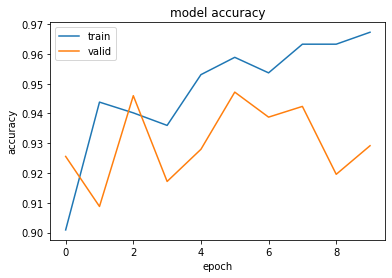

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

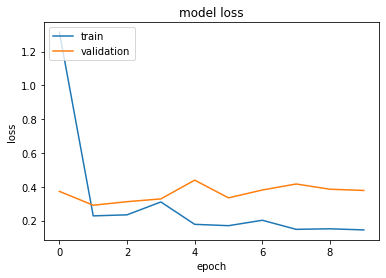

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.09091045707464218, 0.9753210544586182]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.3130878508090973, 0.9111644625663757]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.372219055891037, 0.8666666746139526]

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img

image = load_img('Weapons/test/Knives/3535.jpg', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)

model = load_model('model.h5')

label = model.predict(img)
print(label)


[[7.5607482e-19 1.0000000e+00 3.8465362e-20 1.4048902e-13 5.9304449e-20
  1.2802010e-22]]


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/RPG/948.jpg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand guns', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

machine gun


###Model 2

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 20 ,
                          callbacks = callbacks_list)

Epoch 1/20
 33/250 [==>...........................] - ETA: 2:12 - loss: 0.0793 - accuracy: 0.9818

KeyboardInterrupt: ignored

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


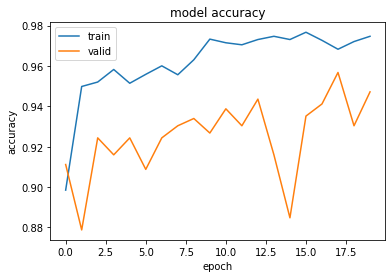

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

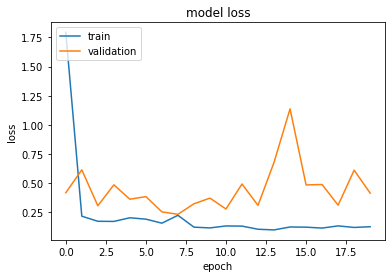

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.04705935716629028, 0.9855538010597229]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.2286297082901001, 0.9375750422477722]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.31384751200675964, 0.9333333373069763]

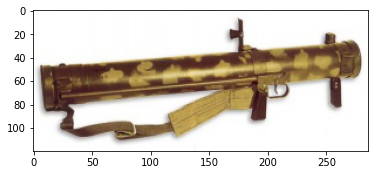

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread('Weapons/test/RPG/948.jpg')
plt.imshow(image)
plt.show()

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img

image = load_img('Weapons/test/Knives/3535.jpg', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)

model = load_model('model.h5')

label = model.predict(img)
print(label)


[[0. 1. 0. 0. 0. 0.]]


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor

if __name__ == "__main__":
    # load model
    model = load_model("model.h5")
    # image path
    img_path = 'Weapons/test/RPG/948.jpg'
    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand guns', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

rpg


###Model 3

In [ ]:
## train your model
my_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

# Saving the history of training epochs and associated metrics to a variable (history)
history = my_model.fit(train_generator,
                          validation_data = validation_generator,
                          epochs = 30 ,
                          callbacks = callbacks_list)

Epoch 1/30
 52/250 [=====>........................] - ETA: 3:32 - loss: 5.0222 - accuracy: 0.8173

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


250/250 [==============================] - 310s 1s/step - loss: 1.5594 - accuracy: 0.8941 - val_loss: 0.4227 - val_accuracy: 0.9040
Epoch 2/30
250/250 [==============================] - 313s 1s/step - loss: 0.2382 - accuracy: 0.9374 - val_loss: 0.2244 - val_accuracy: 0.9472
Epoch 3/30
250/250 [==============================] - 313s 1s/step - loss: 0.1911 - accuracy: 0.9537 - val_loss: 0.3295 - val_accuracy: 0.9400
Epoch 4/30
250/250 [==============================] - 312s 1s/step - loss: 0.1453 - accuracy: 0.9587 - val_loss: 0.4558 - val_accuracy: 0.8908
Epoch 5/30
250/250 [==============================] - 313s 1s/step - loss: 0.1988 - accuracy: 0.9573 - val_loss: 0.2246 - val_accuracy: 0.9364
Epoch 6/30
250/250 [==============================] - 315s 1s/step - loss: 0.1704 - accuracy: 0.9577 - val_loss: 0.2626 - val_accuracy: 0.9400
Epoch 7/30
250/250 [==============================] - 314s 1s/step - loss: 0.1514 - accuracy: 0.9589 - val_loss: 0.2408 - val_accuracy: 0.9484
Epoch 8/30

KeyboardInterrupt: ignored

In [ ]:
print(history.history.keys()) # prints what the history has stored (stored in a dictionary format (key-value pairs))

# summarize history for accuracy on a line chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

NameError: ignored

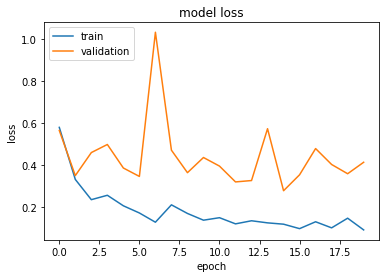

In [ ]:
# summarize history for loss on a line chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
##Load the weights of the best model acquired in training
my_model.load_weights('model.h5')
my_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.02226976491510868, 0.9931781888008118]

In [ ]:
my_model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.3508818745613098, 0.9555822610855103]

In [ ]:
my_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.32769760489463806, 0.8999999761581421]

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img

image = load_img('Weapons/test/Knives/3535.jpg', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)

model = load_model('model.h5')

label = model.predict(img)
print(label)


[[0. 1. 0. 0. 0. 0.]]


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
    model = load_model("model.h5")

    # image path
    img_path = 'Weapons/test/RPG/948.jpg'    # dog
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat

    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand guns', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

    #print(pred)

rpg


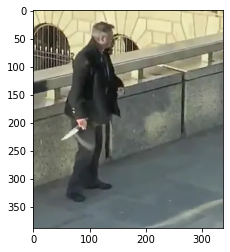

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread('londonmanknife.png') #londonman.png
plt.imshow(image)
plt.show()

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img

image = load_img('londonmanknife.png', target_size=(256, 256))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,256,3)

model = load_model('model.h5')

label = model.predict(img)
print(label)


[[3.8569762e-16 1.0000000e+00 4.9224754e-14 3.2928960e-25 7.8861997e-20
  6.8796063e-24]]


In [ ]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor

if __name__ == "__main__":
    # load model
    model = load_model("model.h5")
    # image path
    img_path = 'londonmanknife.png'
    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    max_index = np.argmax(pred)
    classes = ['grenade', 'knives', 'machine gun', 'masked face', 'pistol hand guns', 'rpg']
    weapons_pred = classes[max_index]
    print(weapons_pred)

knives
